# Hyun-Joon Yang
# yanghyun@usc.edu
# BISC 481
# HW3

<hr>

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
.output_jpeg {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
.center {
    text-align: center;
    margin: auto;
}
</style>
""")

## Question 1: High-Throughput Methods

### A. Briefly describe the in vitro experiments SELEX-seq and PBM and the in vivo experiment ChIP-seq. 5pts

* In SELEX-seq, protein is bound to a surface as random library of DNA sequences are put through. Then, how often each sequence bound to the protein is calculated to determine the protein's affinity for certain sequences. On the other hand, in PBM, DNA is bound to a surface as proteins are put through.
* ChIP-seq tries to identify the locations in the genome bound by certain proteins by isolating the regions bound by the protein in question and identifying the sequence and its location.

### B. Compare and discuss the advantage and disadvantage of these methods and what sort of biological questions they may be relevant to. 5pts

* One advantage of high-throughput methods is that they are massively parallel meaning a lot of data can be generated quickly. One disadvantage is that they are high in cost.
* These methods are important in studying protein readout mechanisms especially when structure is not known.

## Question 2: Protein-DNA Recognition

### A. Briefly explain the physical mechanisms relevant for (a) base readout and (b) shape readout of DNA sequence by DNA binding proteins. 4pts

* In base readout, specific patterns of H-bond donors, acceptors, and nonpolar groups on the protein is matched to a complementary pattern displayed on the DNA
* In shape readout, protein recognizes the DNA based on its shape (electropotential due to conformation like major or minor grooves)

### B. Download and install the PyMol plugin PDIviz, which is designed for visualizing protein-DNA interfaces.
PDIviz can be found here: http://melolab.org/mbl/pdiviz

General instructions for installing PyMol plugins can be found here: https://pymolwiki.org/index.php/Plugins#Installing_Plugins
### Using the plugin, visualize the structures (a) 1T2K and (b) 1KX5.
### Determine which regions of the DNA are contacted by the protein and explain any differences that you observe.
### Include the structure visualizations in your report. 5pts

In both complexes, both the major and minor grooves of the DNA are contacted by the protein. However, it seems base readout is more of a factor in 1T2K whereas shape readout is more important in 1KX5.

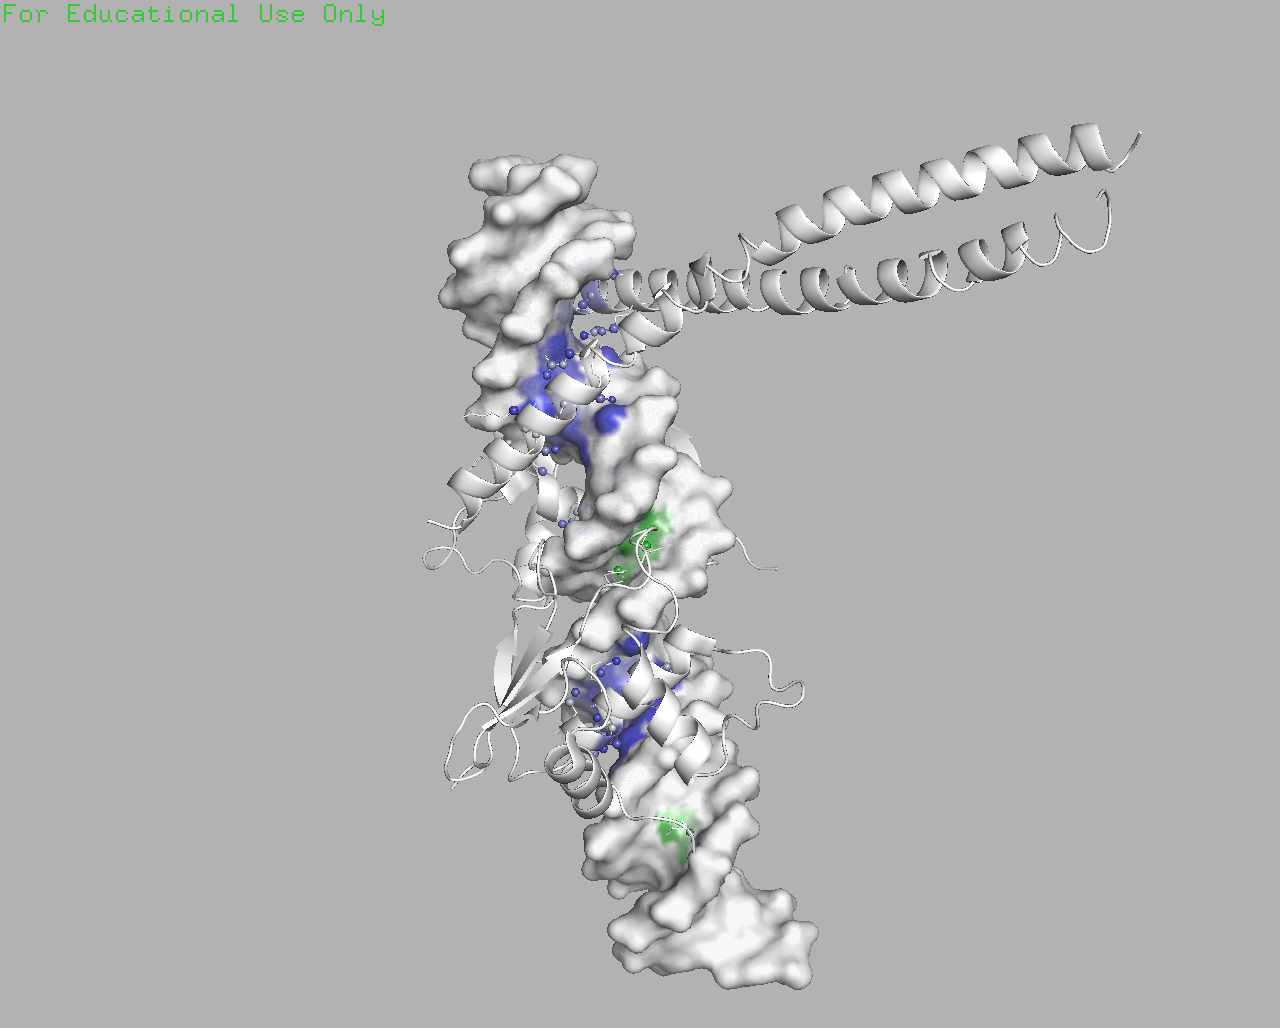

In [2]:
Image('2B-1.png', width=300)

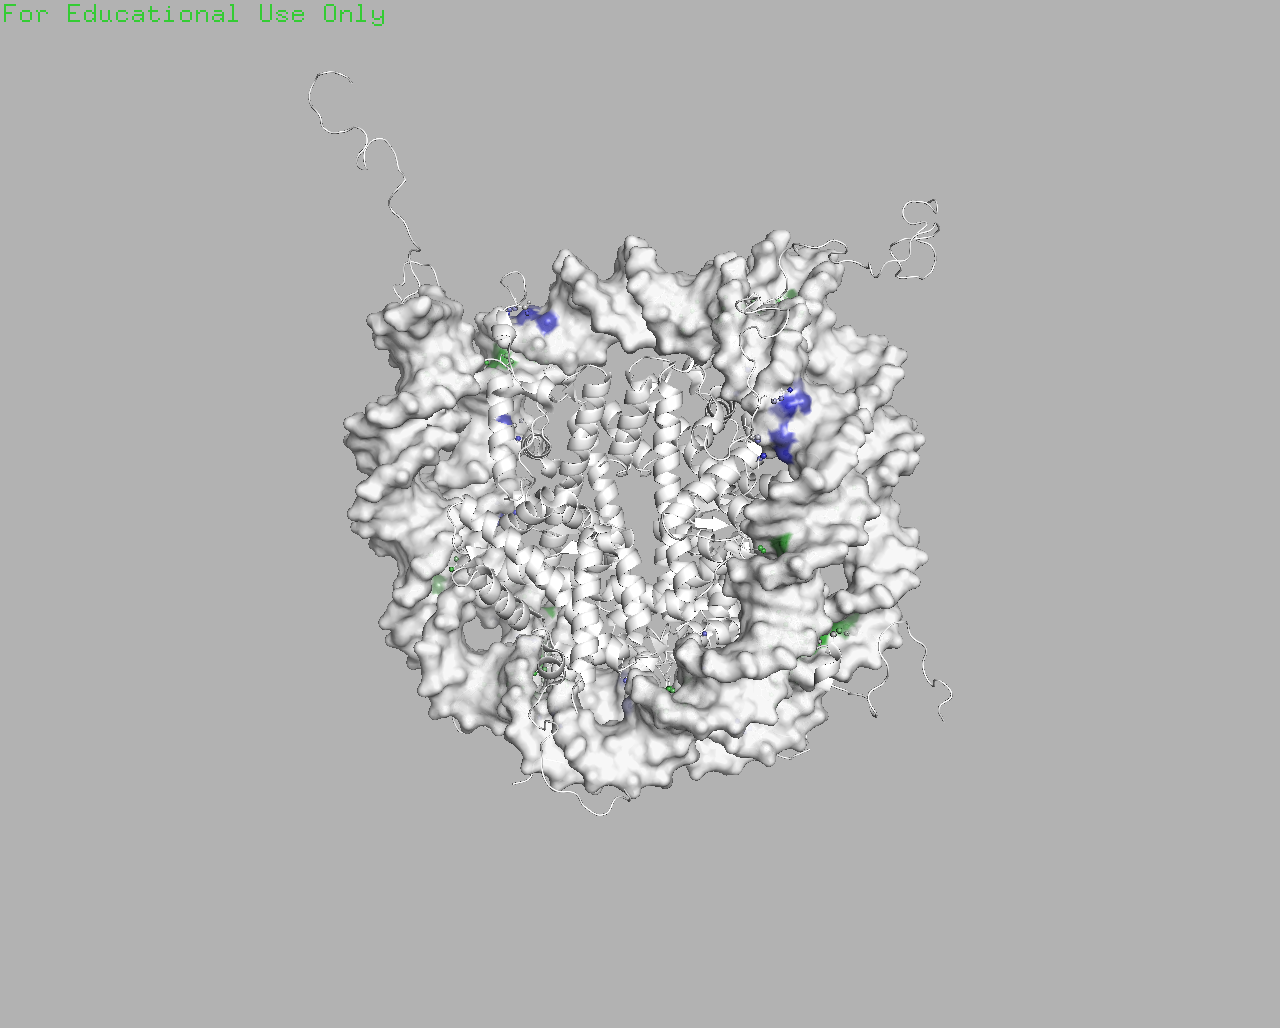

In [3]:
Image('2B-2.png', width=300)

### C. Access the Proteopedia pages (a) http://www.proteopedia.org/w/Hox-DNA_Recognition and (b) http://www.proteopedia.org/w/P53-DNA_Recognition.
### Briefly explain for (a) Hox proteins and (b) p53 which structural features of the respective DNA binding sites are important for achieving binding specificity. 6pts.

* Hox proteins' binding specificity is increased when a co-factor is present
* P53 proteins must form a tetramer to bind to DNA

## Question 3: Molecular Dynamics

In this question we’re going to implement a teeny tiny molecular dynamics simulation for a single particle in the potential 𝑉(𝑥) = 𝑥2. Molecular Dynamics is based on solving Newton’s equations of motion which relates the force on a particle to its acceleration:

$$F(x) = ma$$

This equation says that the force acting on a particle (which is a function of its position 𝑥) is equal to the mass of the particle times its acceleration. Rememberthat acceleration is defined as:

$$ a = \frac{{d^2}x}{dt^2} $$

Therefore, we can write:

$$ F(x) = m\frac{{d^2}x}{dt^2} $$

Our goal is, given a force, to find 𝑥 as a function of time: 𝑥 = 𝑥(𝑡). To solve this equation numerically (i.e. with the aid of a computer), we can use what is known as Verlet integration. A full discussion of this is beyond the scope of this course, but just know that Verlet integration is a way to accurately solve Newton’s equation numerically (I encourage you to learn more on your own).

First, we have to discretize our position and time variables. This means that rather than treating them as continuous variables, we only consider them at particular fixed intervals. For example, we can have that 𝑡 = 0.0, 0.2, 0.4, 0.6, … (which corresponds to a time step Δ𝑡 = 0.2) and we would then want to figure out what the corresponding values of 𝑥 are at each time step, based on newton’s equation.

Verlet integration tells us that, given a time step Δ𝑡, (which means how far apart our time intervals are spaced), and a function which defines a force 𝐹, that

$$ x_i = 2x_{i-1}-x_{i-2}+\frac{F(x_{i-1})}{m}\Delta{t^2} $$

Here, $x_i$ simply means the position of the particle at the ith time step. Please answer the following questions and include your answers in your report.

### A. Using the potential $𝑉(𝑥) = 𝑥^2$, what is the corresponding force? Be sure you get the sign correct, or the later part of this question will not work! 2pts

$$ F(x) = -\frac{dV}{dx} $$
<br>
$$ V(x) = x^2 $$
<br>
$$ F(x) = -2x $$

### B. Let’s do a quick practice run with Verlet integration. Using a constant force $𝐹 = −9.8$, a mass $𝑚 = 1.0$, and a time step $Δ𝑡 = 0.1$ complete the following table. Use equation (1) to update the position ( $𝑥_𝑖$ ) at each time step and fill out the table below. Include the completed table in your report. 6pts

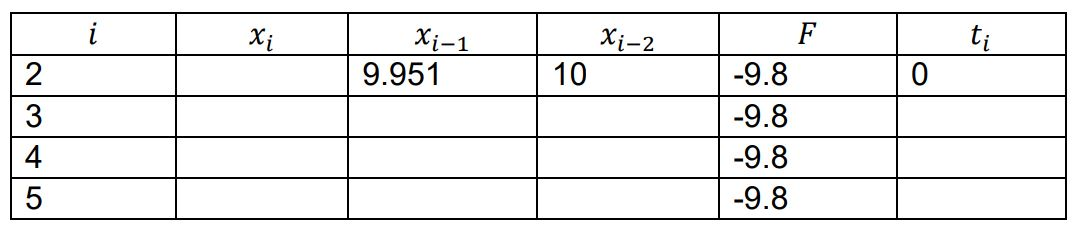

In [4]:
Image('img1.jpg')

In [5]:
import numpy as np
    
def calc_xi(i1, i2, F, dt, m):
    """
    :param i1: x_i-1
    :param i2: x_i-2
    :param F: function object for Force
    :param dt: delta t
    :param m: mass
    :returns: value of xi (position at time i)
    """
    return 2*i1 - i2 + (F(i1)/m)*(dt**2)

# create array
n = 4
data = np.zeros((n, 6))

# initialize initial values
for i in range(n):
    data[i,0] = i+2
data[0,2] = 9.951
data[0,3] = 10
data[0,4] = -9.8
data[0,5] = 0

# set variables
def F(i1):
    """
    :param i1: x_i-1
    :returns: value of force at x_i-1
    """
    return -9.8
dt = 0.1
m = 1.0

# calculate initial
data[0,1] = calc_xi(data[0,2], data[0,3], F, dt, m)
# fill in rest
for i in range(1,data.shape[0]):
    data[i,2] = data[i-1,1]
    data[i,3] = data[i-1,2]
    data[i,4] = F(data[i,2])
    data[i,5] = data[i-1,5] + dt
    data[i,1] = calc_xi(data[i,2], data[i,3], F, dt, m)
    
print(data)

[[ 2.     9.804  9.951 10.    -9.8    0.   ]
 [ 3.     9.559  9.804  9.951 -9.8    0.1  ]
 [ 4.     9.216  9.559  9.804 -9.8    0.2  ]
 [ 5.     8.775  9.216  9.559 -9.8    0.3  ]]


### C. Once you’ve figured out how to do part B, it’s trivial to pop in a different force, time step and initial conditions and solve Netwon’s equation for any system, including an entire protein structure! Of course, how good we can do depends on how accurate our force field is in the case of a protein, but let’s do a very simple example using a single particle in one dimension.
### Create a similar table as in part B (or arrays/vectors if you’re using something like Python or R), but this time use the force you determined in part A (which is NOT constant). I have provided initial conditions below.
### Compute $𝑥_𝑖$ and $𝑡_𝑖$ for about 400 time steps, and then plot $𝑥_𝑖$ vs $𝑡_𝑖$ ($𝑡_𝑖$ on the horizontal axis). Use $𝑚 = 1$ and $Δ𝑡 = 0.01$.
### What kind of motion is the particle undergoing?
### Include your plot with proper labels. Do not include a table in your report. 12pts

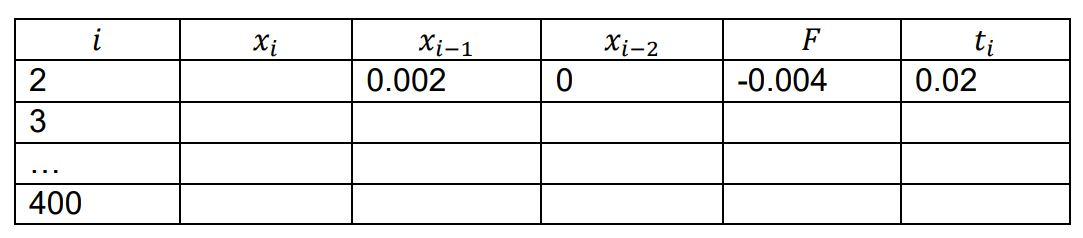

In [6]:
Image('img2.jpg')

In [7]:
# create array
n = 399
data = np.zeros((n, 6))

# initialize initial values
for i in range(n):
    data[i,0] = i+2
data[0,2] = 0.002
data[0,3] = 0
data[0,4] = -0.004
data[0,5] = 0.02

# set variables
def F(i1):
    """
    :param i1: x_i-1
    :returns: value of force at x_i-1
    """
    return -2*i1
dt = 0.01
m = 1.0

# calculate initial
data[0,1] = calc_xi(data[0,2], data[0,3], F, dt, m)
# fill in rest
for i in range(1,data.shape[0]):
    data[i,2] = data[i-1,1]
    data[i,3] = data[i-1,2]
    data[i,4] = F(data[i,2])
    data[i,5] = data[i-1,5] + dt
    data[i,1] = calc_xi(data[i,2], data[i,3], F, dt, m)

# np.set_printoptions(precision=5, suppress=True, threshold=3000)
# print(data)

Text(0, 0.5, 'Position (x)')

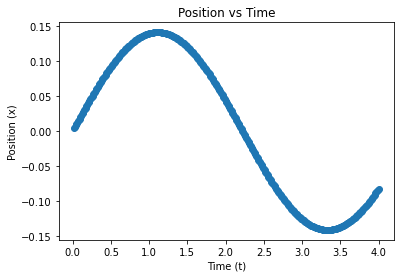

In [8]:
import matplotlib.pyplot as plt

plt.scatter(data[:,5], data[:,1])
plt.title('Position vs Time')
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')

<div class='center'><strong>The particle is undergoing an oscillating motion.</strong></div>

## Question 4: Structure Determination

Let’s look at some X-ray crystallography data. I have provided three solved protein structures, `a6.pdb`, `06.pdb` and `08.pdb` and corresponding `*.dsn6` files that contain electron densities for these proteins.

### A. For each PDB file, open it in PyMol and then also open the corresponding `*.dsn6` file. You’ll be presented with a dialog window when you load the `*.dsn6` file, make sure to check the isomesh box and leave everything else as-is.

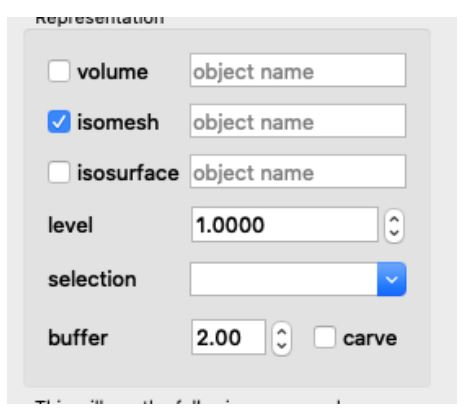

In [9]:
Image('img3.jpg', width=200)

### Change the visualization type for the protein structure from “cartoon” to “lines”. Then, using a PyMol selection, select and zoom in on the residue ASN 132 for each structure, showing a clear view of the side chain and electron density.
### Include these visualizations in your report, making sure to label each one appropriately.
### Each of these structures was determined from a different electron density resolution. Based on what you observe of the electron density contours, order the structures for highest (best) resolution to lowest (worst) resolution. 6pts

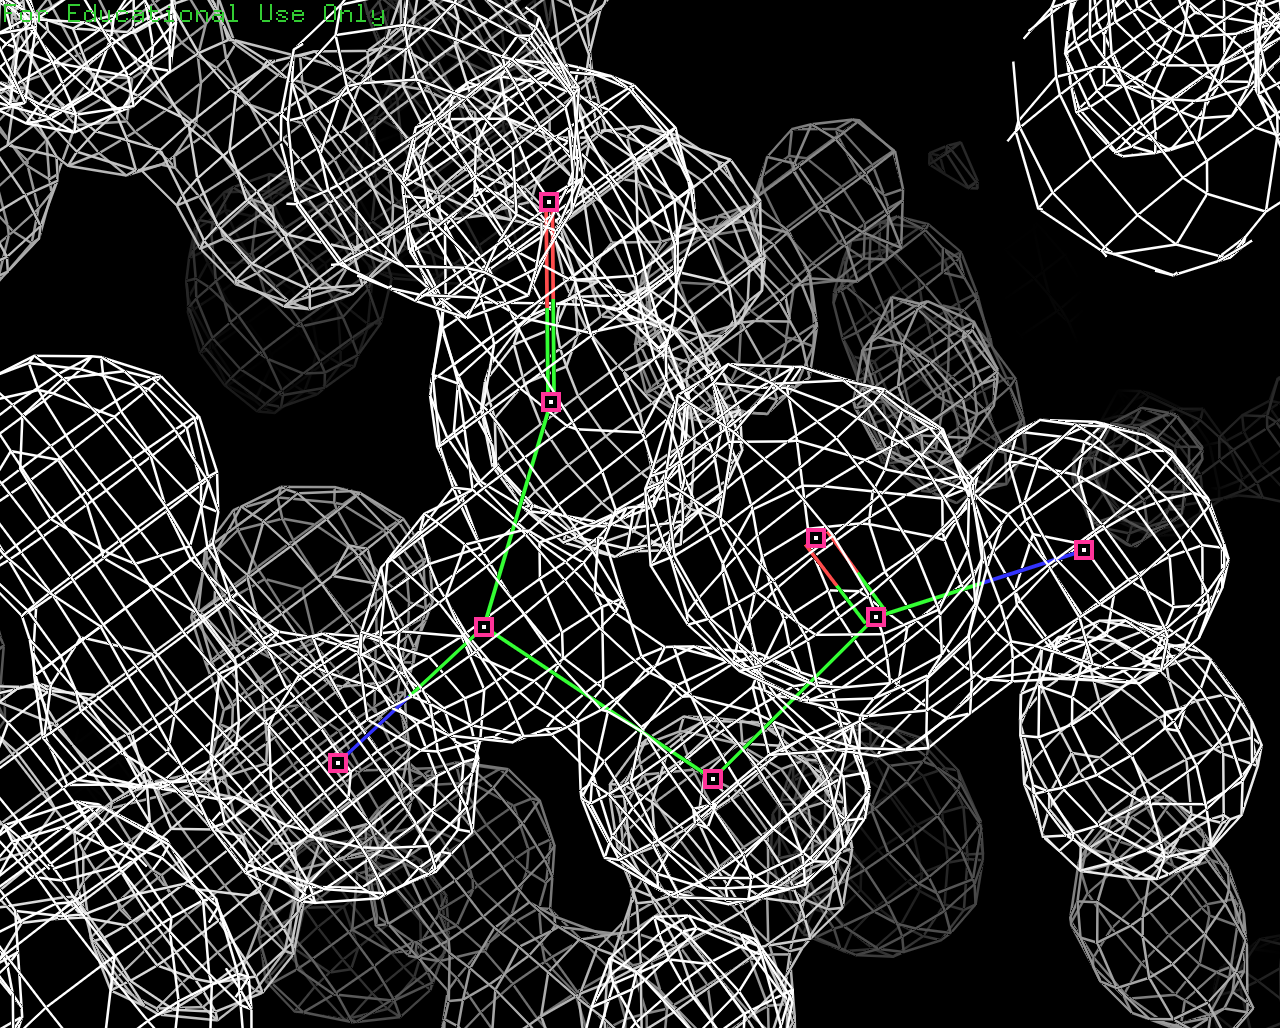

In [10]:
Image('4A-1-a6.png', width=450)

<div class='center'>Image above: <strong>a6</strong></div>

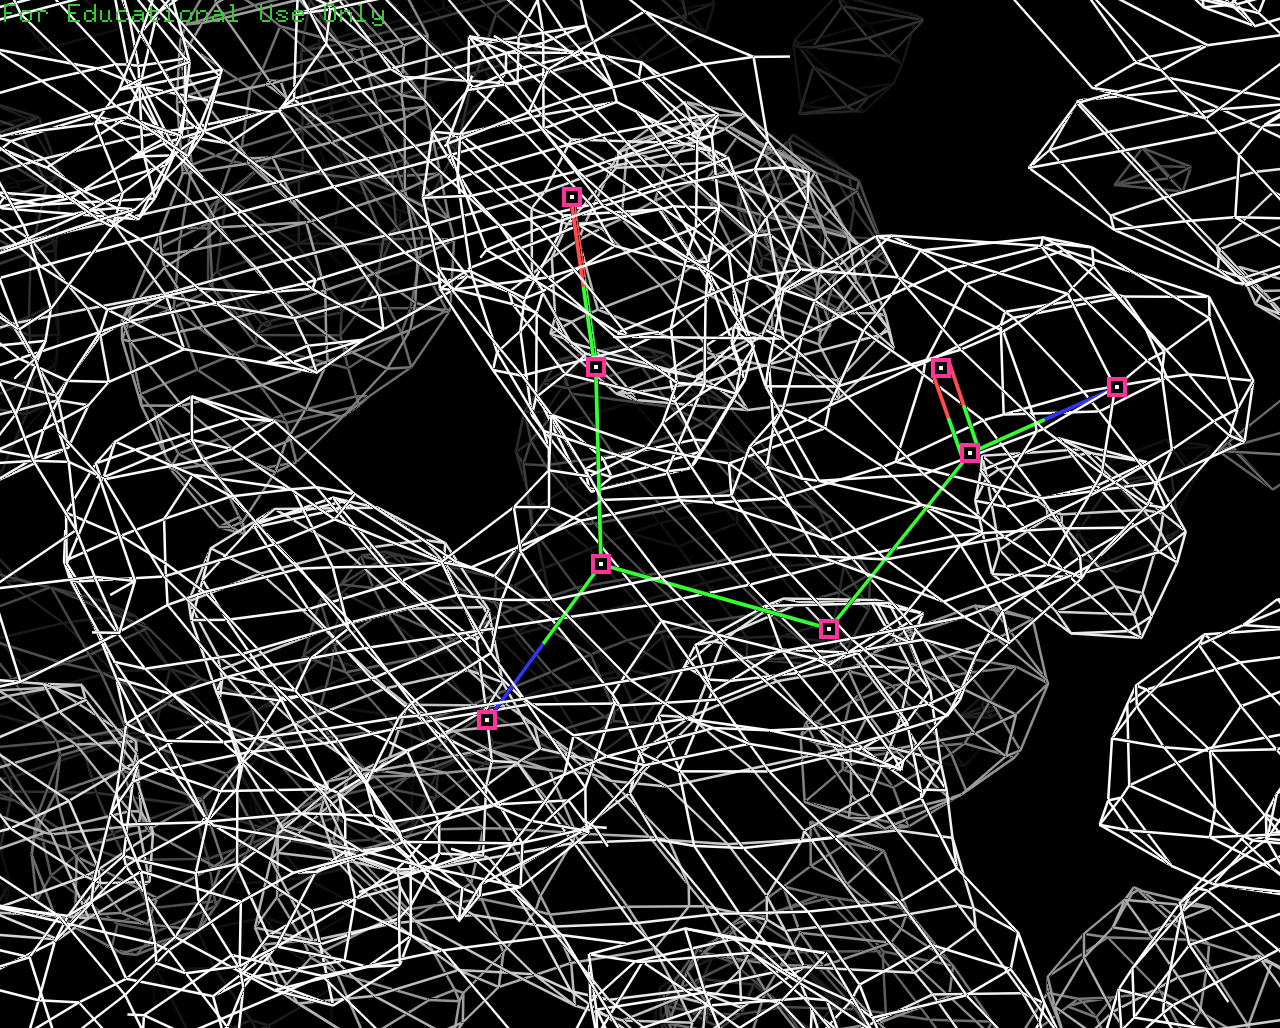

In [11]:
Image('4A-2-06.png', width=450)

<div class='center'>Image above: <strong>06</strong></div>

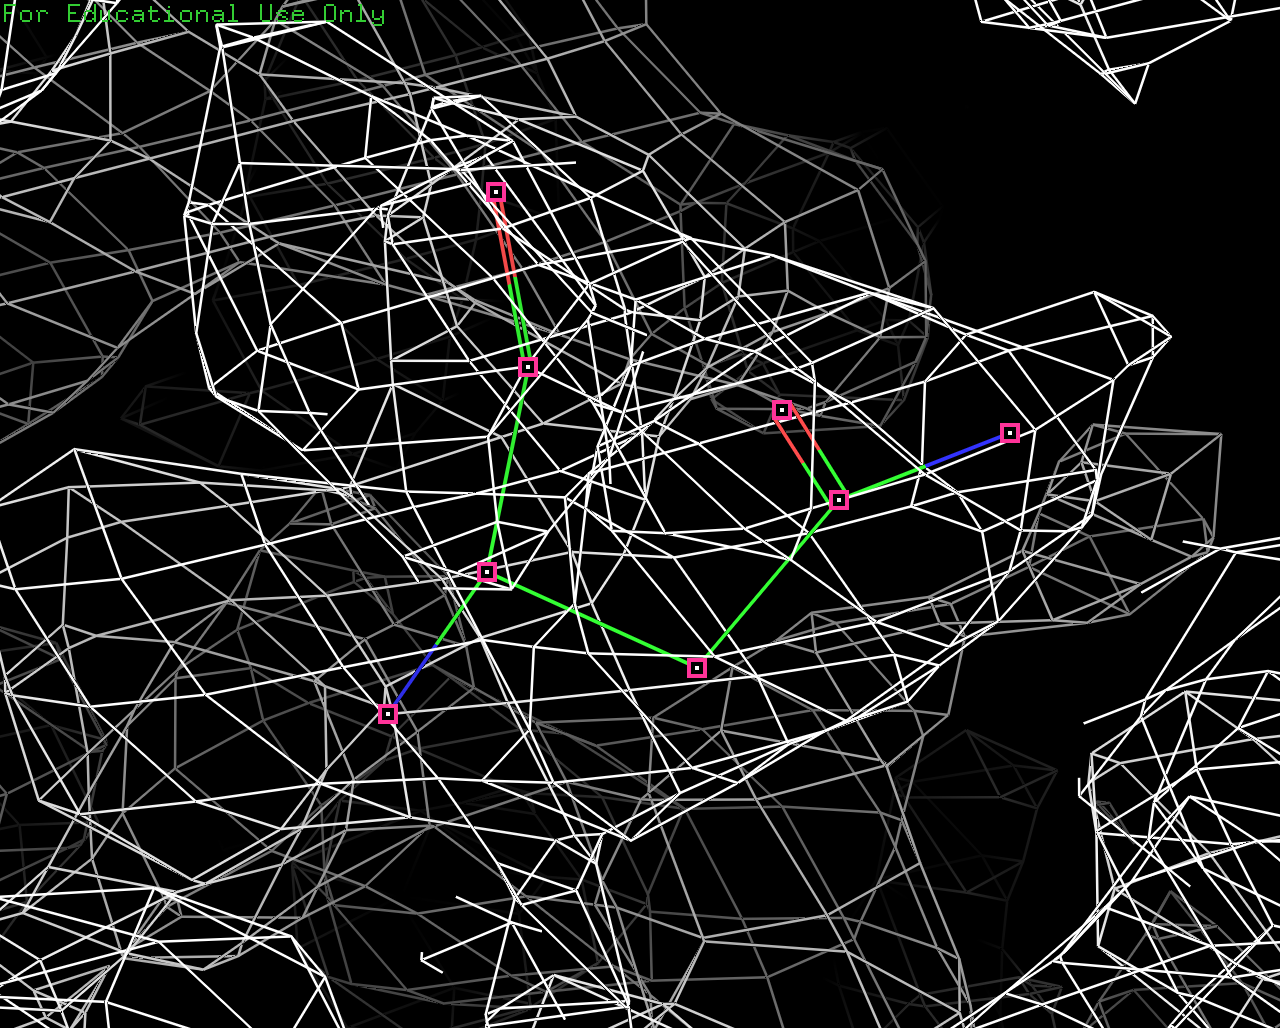

In [12]:
Image('4A-3-08.png', width=450)

<div class='center'>Image above: <strong>08</strong></div>

<div class='center'><strong>Best to worst resolution: a6 $\rightarrow$ 06 $\rightarrow$ 08</strong></div>

### B. You may notice that the density contour on the poorer resolution structures could leave some room for interpretation about the orientation of the ASN side-chain. How might a structural biologist resolve this issue? 4pts

One way to determine the correct orientation of the ASN side-chain could be to look at the polarity of the molecule as asparagine is expected to be polar under normal conditions. Another way would be to calculate the orientaion for which the energy is minimum.

### C. For the a6 structure/electron density, have a look at the residue GLN 126. Zoom in on it and provide a visualization in your report. You may notice that there are two side chains for this residue! What is going on here, and what might be the cause of this? 5pts

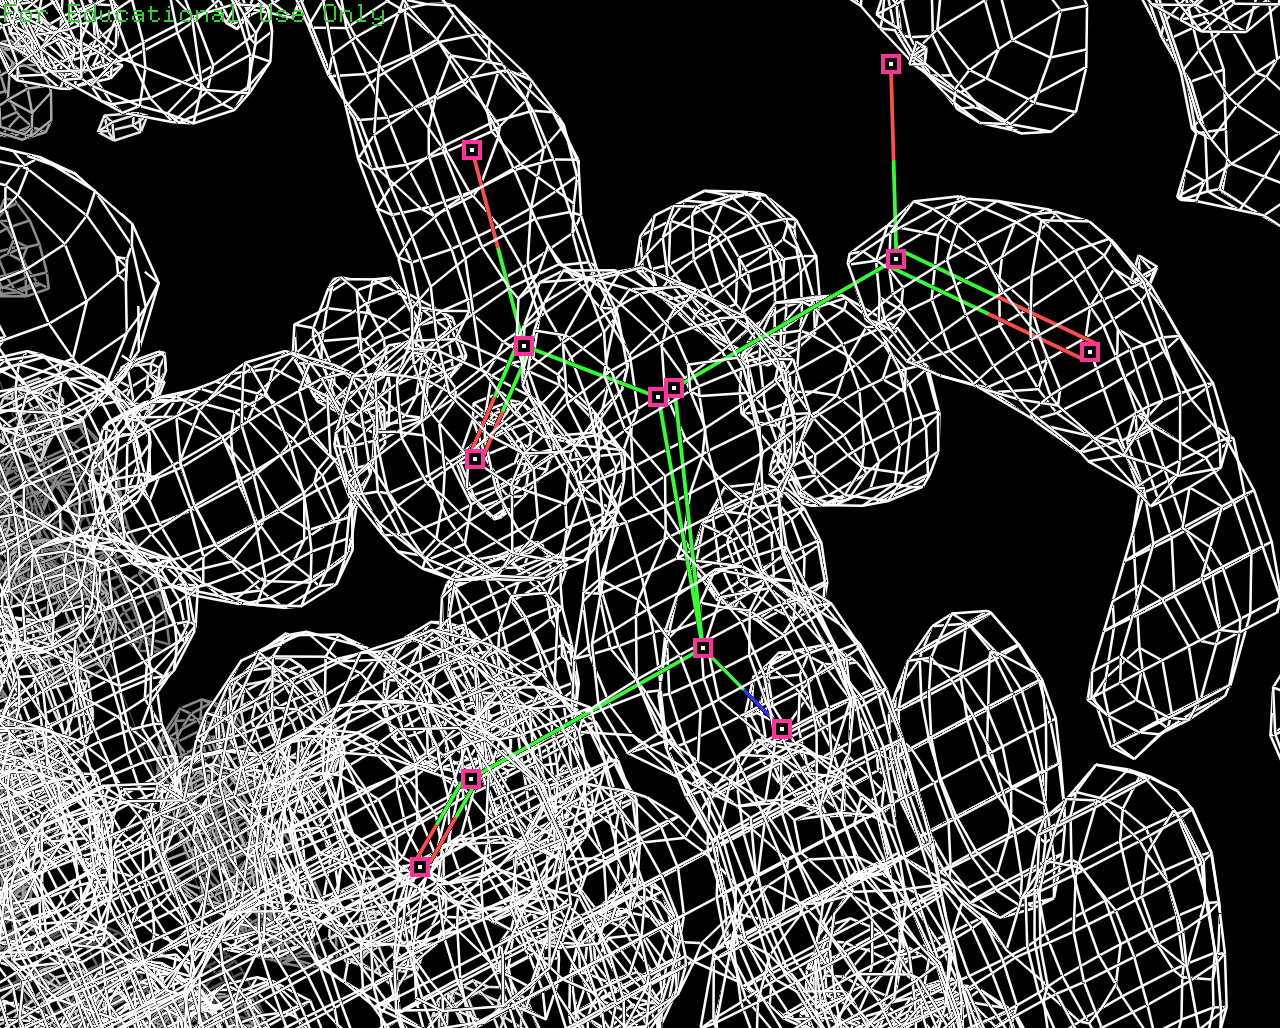

In [13]:
Image('4C.png', width=450)

My guess is that there was an error or a fault in turning the electron density map into the protein model.

## Question 5: \*\*BONUS\*\*
In order to do this question, please install the following python modules in conda if not already installed:
```
conda install sklearn
conda install jupyter
```
This question will use the file hw3.ipynb which is a python notebook. To open it, run jupyter notebook hw3.ipynb from a terminal window. This is an interactive python session, if you’re unfamiliar with how these work take a quick look here: https://towardsdatascience.com/a-beginners-tutorial-to-jupyter-notebooks-1b2f8705888a

Follow along with the notebook and write the code as you go! This question is based on this paper: https://rohslab.usc.edu/Papers/2015_Pnas_Zhou.pdf so you may want to have a look at that for some more background. Your goal is to produce a plot similar to the one below (you’ll understand what this means when you go through the notebook). Note that the values here have been intentionally changed, you won’t get the same results.

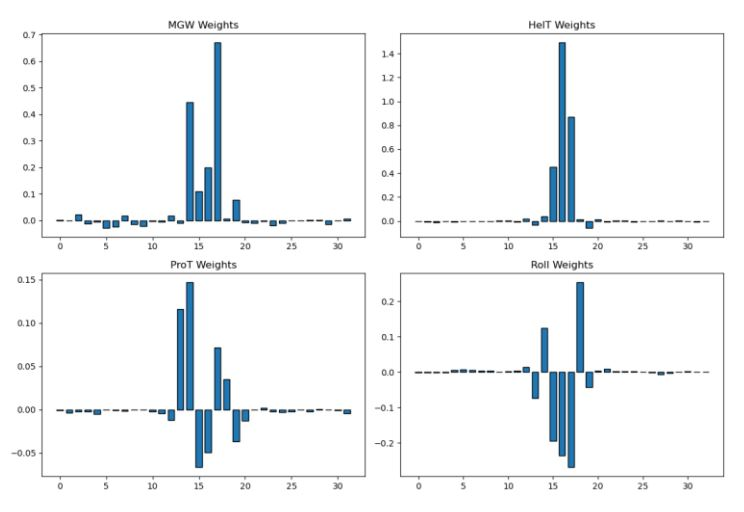

In [14]:
Image('img4.jpg')

## Bonus Question: Prediction of Protein-DNA binding

In this question we are going to be using a simple mathematical model to predict the [binding specifity](https://en.wikipedia.org/wiki/DNA-binding_protein#Binding_to_specific_DNA_sequences) of a particular transcription factor known as "MAD" from [gcPBM data](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=%20GSE59845) (see here for a review of the biology of this and closely related TFs: [https://pubmed.ncbi.nlm.nih.gov/11031250](https://pubmed.ncbi.nlm.nih.gov/11031250/)).

Given a particular DNA sequence from some large pool of fixed-length sequences, which we'll call $S$, we can model the specificity for a particular protein (in this case MAD) to bind this sequence. Let $P$ be our specificity score, and let $\vec{x}^{(S)}$ be a vector of *features* which describe, in some way, the sequence $S$ numerically. We will use linear regression to model the dependence of $P$ on $\vec{x}^{(S)}$:

\begin{equation}
\hat{P} = \sum_i w_i x^{(S)}_i + b
\end{equation}

Here the parameters $w_i$ are called the *weights* of our model, and $b$ is an additive constant called a *bias*. If we can find a reasonable representation of a nucleotide sequence as a feature vector, then we can use this simple linear mathematical model to predict what the binding specificity should be - that is, assuming we have appropriate values for all of our $w_i$ and $b$. How we obtain these values is based on a science called *machine learning*! Our goal is to find a set of $w_i$ and $b$ such that we minimize the difference between our observed specifities and the predicted ones:

\begin{equation}
\{w_i, b\} = \text{argmin}_{w_i, b} |P - \hat{P} |
\end{equation}

We're going to implement a simple linear regression model, then find good values of $w_i$ and $b$ using a large number of samples which are provided to you as training data. This is more of a hands-on tutorial, the details underlying all of this will be something you need to pursue for yourself (but feel free to ask questions).

Let's get started with some code!

In [15]:
# First we need to import some python packages we'll be using
import numpy as np
from sklearn.linear_model import Ridge # this is a linear regression class
%matplotlib inline
from matplotlib import pyplot as plt # plt is used for making plts

Now we need to load our training data. This consists of pairs of sequences and specifity scores for that sequence, measured for the MAD protein. This data is found in the file 'Mad.txt'. The code below will parse and load that data for you.

In [16]:
# The following peice of code is going to load in our MAD sequence/specificity data
sqs = [] # array to store sequences
sps = [] # array to store specificities
with open('Mad.txt') as FH:
    for line in FH:
        line = line.strip().split()
        sqs.append(line[0])
        sps.append(float(line[1]))
sps = np.array(sps) # convert from a list to numpy array

# Let's see what we have so far
print("Loaded the MAD data. Here are some samples:")
print(sqs[0], sps[0])
print(sqs[1], sps[1])
print(sqs[2], sps[2])

Loaded the MAD data. Here are some samples:
GGGCATGAAAGCCACCTCGTGGTTTTGCAGCAAGTG 8.76342807395385
CGGGGAGGAGCCACCCACGCGCCACAGCAAGTCCTG 7.90341156623703
GGCGGCCCGGGCATCCACGTGGGTCGGGCTCCTGGT 10.2088744652314


Next we need to define a numerical feature vector for each sequence so that we can apply our linear regression model. To do so, we'll use a method known as [one hot encoding](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning).

For each position in the sequence we will assign the letter of our nucleotide alphabet (A,C,G,T) to a sparse representation using the following rules:

\begin{align}
A \to & [1, 0, 0, 0] \\
C \to & [0, 1, 0, 0] \\
G \to & [0, 0, 1, 0] \\
T \to & [0, 0, 0, 1]
\end{align}

We then concatenate these representations, for every letter in the sequence, to form a feature vector. For example, the following sequence will be mapped to the feature vector below using the rules above:

\begin{equation}
AGCT \to [1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1]
\end{equation}

Thus a length $N$ sequence is mapped to a length $4N$ sparse feature vector. The function below will automatically take a list of sequences and convert them to a numpy array of sparse feature vectors.

In [17]:
# We are going to encode the sequence data
def encodeSequences(seq_length, sequences):
    """This function takes as input the length of our sequences and a list of sequences."""
    index = {
        'A': 0,
        'C': 1,
        'G': 2,
        'T': 3
    }
    encoded = np.zeros((len(sequences), 4*seq_length))
    
    for i, seq in enumerate(sequences):
        for j, char in enumerate(seq):
            encoded[i, 4*j+index[char]] = 1
    return np.array(encoded)            

In the following cell use this function to convert the list of sequences called `sqs` (from above) to a numpy array of featue vectors, then compare the first sequence (e.g. `sqs[0]`) to its feature vector representation.

In [18]:
# use encodeSequences() to create an array of feature vectors and call it simply 'Xseq'
Xseq = encodeSequences(len(sqs), sqs)

# now print the first sequence and first feature vector and check that it's all good
# np.set_printoptions(threshold=len(sqs)*4)
# np.set_printoptions(threshold=1000)
print(sqs[0])
print(Xseq[0,:])

GGGCATGAAAGCCACCTCGTGGTTTTGCAGCAAGTG
[0. 0. 1. ... 0. 0. 0.]


Cool, now we have numerical feature vectors and targets (the specifity scores), so let's do some machine learning. The following line defines a linear regression model based on the [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) class, and then fits the weights of the model using our data. 

In [19]:
# Now we fit the data using the magic of libraries and machine learning
seq_model = Ridge(alpha=0.5)
seq_model.fit(Xseq, sps)

Ridge(alpha=0.5)

We can evaluate the performance of our model using the 'score' method of the Ridge class (which we have instantiated in our `seq_model` variable). 

In [20]:
seq_model.score(Xseq, sps)

0.7811748802968062

You should get a value around 0.78. Note that 1.0 is a perfect score, so this isn't too bad given how simple both our model and our encoding method was! However, we can greatly improve upon this by adding more features to our model, and in this case let's use DNA shape information. 

In [21]:
def loadShapeData(file_name):
    shape_data = []
    with open(file_name) as FH:
        for line in FH:
            if line[0] == '>':
                # this is a header, ignore it
                continue
            line = line.strip().split(',')
            # now we parse the line, removing 'NA' values
            data = []
            for val in line:
                if val == 'NA':
                    continue
                data.append(val)
            shape_data.append(data)
    
    return np.array(shape_data, dtype=np.float32) # a feature matrix containing DNA shape information

Now, using the function `loadShapeData()` defined above, load the DNA shape information which is provided to you in the files "Mad.txt.fa.MGW", "Mad.txt.fa.HelT", "Mad.txt.fa.ProT" and "Mad.txt.fa.Roll". These files provide various DNA shape information for every sequence in the "Mad.txt" file (in the same order). Using the `concatenate()` method provided by numpy (google it), concatenate these DNA shape information feature matrices with the original sequence encoding feature matrix we called `Xseq`. Call the new feature matrix `Xseq_shape`.

You should then have, for every sequence, a new feature vector which looks like

\begin{equation}
\vec{x}^{(S)} = [\{\text{sequence encoding}\},\{\text{minor groove width data}\}, \{\text{helical twist data}\}, \{\text{roll data}\}, \{\text{propeller twist data}\}]
\end{equation}

In [22]:
### REPLACE ME WITH CODE
data_list = [loadShapeData('Mad.txt.fa.MGW'),
             loadShapeData('Mad.txt.fa.HelT'),
             loadShapeData('Mad.txt.fa.Roll'),
             loadShapeData('Mad.txt.fa.ProT')]

Xseq_shape = np.concatenate((Xseq, data_list[0]), axis=1)
num_col = Xseq.shape[1] + data_list[0].shape[1]
for i in range(1,len(data_list)):
    print(data_list[i].shape)
    num_col += data_list[i].shape[1]
    Xseq_shape = np.concatenate((Xseq_shape, data_list[i]), axis=1)
print(Xseq_shape)
print(Xseq_shape.shape)
print(num_col)

(7534, 33)
(7534, 33)
(7534, 32)
[[  0.           0.           1.         ...  -9.89999962 -10.21000004
   -4.48000002]
 [  0.           1.           0.         ...  -7.34000015  -5.38999987
   -0.89999998]
 [  0.           0.           1.         ...  -0.89999998  -5.53999996
   -4.44000006]
 ...
 [  0.           0.           1.         ...  -3.03999996  -3.57999992
   -3.57999992]
 [  0.           1.           0.         ...  -3.86999989  -1.72000003
   -6.76000023]
 [  0.           1.           0.         ...  -7.55000019  -7.4000001
   -8.52000046]]
(7534, 30266)
30266


Ok, so now same as we did above, create a linear regression model with the `Ridge` class (call it `seq_shape_model`), fit it to the data, and print the score. Please use a value of 1.0 for the `alpha` keyword argument. Did we do any better?

In [23]:
### REPLACE ME WITH CODE
seq_shape_model = Ridge(alpha=0.5)
seq_shape_model.fit(Xseq_shape, sps)
seq_shape_model.score(Xseq_shape, sps)

0.9586932918105175

Now for the fun part! I want you to plot the weights our model has learned using the `plt.bar()` [function](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.bar.html) from the matplotlib libary. You can find examples from the link. I included a sample plot in the HW assignment to give you an idea of what you should be doing. Note your plot does not have to look exactly like this.

Plot the weights that correspond to the minor groove width features, the helical twist features, the propeller twist features and the roll features. You can get all the weight values from the `.coef_` attriubute of your `seq_shape_model` object. You then need to slice into that array of weights to get the weights corresponding to the various shape parameter features, and plot them against their position in the DNA sequence.

(30266,)


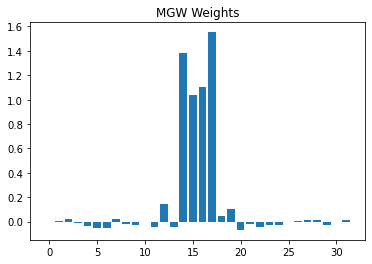

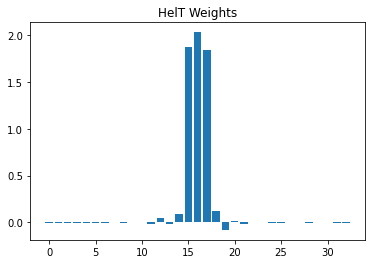

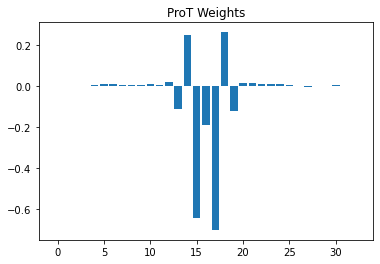

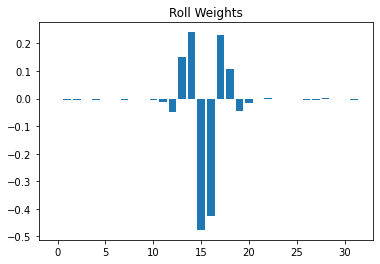

In [24]:
# REPLACE ME WITH CODE
titles = ['MGW Weights', 'HelT Weights', 'ProT Weights', 'Roll Weights']
print(seq_shape_model.coef_.shape)
start = Xseq.shape[1]
for i in range(len(data_list)):
    n = data_list[i].shape[1]
    end = start + n
    plt.bar(range(n), seq_shape_model.coef_[start:end])
    plt.title(titles[i])
    plt.show()
    start = end

Hopefully you've made it this far! Using the plots you generated, answer the following questions and include them in your report:

### A. How does the value of a shape parameter feature weight relate to the contribution of that shape parameter to binding specifities, based on our linear model?

The greater the magnitude of the weight, the higher the contribution.

### B. Based on the position and value of the shape parameter weights, what can you say about the DNA shape preferences of the protein MAD? Remember that specificity is a positive number and larger means stronger binding.

The protein MAD prefers larger minor groove width and helical twist of the middle sequences whereas it prefers smaller propeller twist and roll.

### C. How might these results help explain the sequence preferences of MAD?